NETWORK INTRUSION DETECTION USING MACHINE LEARNING

In [ ]:
#Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import confusion_matrix,classification_report, confusion_matrix, roc_curve, auc
from sklearn.preprocessing import OneHotEncoder, StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()


Reading the dataset

In [6]:
df = pd.read_csv("removed_nullvalues.csv")
print("Dataset Shape:", df.shape)
print("\nFirst 10 rows of the dataset:")
df.head(10)
df['class'].value_counts()
df.describe(include='all')

Dataset Shape: (22529, 40)

First 10 rows of the dataset:


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
count,22529.000000,22529,22529,22529,2.252900e+04,2.252900e+04,22529.000000,22529.000000,22529.000000,22529.000000,...,22529.000000,22529.000000,22529.000000,22529.000000,22529.000000,22529.000000,22529.000000,22529.000000,22529.000000,22529
unique,NaN,3,64,11,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,tcp,http,SF,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,anomaly
freq,NaN,18869,7845,14862,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12827
mean,219.004794,NaN,NaN,NaN,1.039981e+04,2.054350e+03,0.000311,0.008434,0.000710,0.105375,...,140.718940,0.608600,0.090547,0.132213,0.019643,0.097834,0.099447,0.233492,0.226785,NaN
std,1407.633674,NaN,NaN,NaN,4.729436e+05,2.122490e+04,0.017625,0.142646,0.036485,0.928648,...,111.783377,0.435693,0.220700,0.306201,0.085417,0.273153,0.281886,0.387282,0.400937,NaN
min,0.000000,NaN,NaN,NaN,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,0.000000,NaN,NaN,NaN,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,15.000000,0.070000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
50%,0.000000,NaN,NaN,NaN,5.400000e+01,4.600000e+01,0.000000,0.000000,0.000000,0.000000,...,167.000000,0.920000,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
75%,0.000000,NaN,NaN,NaN,2.870000e+02,6.010000e+02,0.000000,0.000000,0.000000,0.000000,...,255.000000,1.000000,0.060000,0.030000,0.010000,0.000000,0.000000,0.360000,0.170000,NaN


Steps taken

1.converting the target column [class] into a binary representation

2.coverting the categorical columns into a binary representation using one hot encoding

3.considering a train-test split of 80-20 


In [6]:
data = pd.read_csv('removed_nullvalues.csv')

# Convert target column 'class' to binary
data['class'] = data['class'].map({'anomaly': 1, 'normal': 0})

# Define categorical columns
categorical_columns = ['protocol_type', 'service', 'flag']

# One-hot encoding for categorical columns
encoder = OneHotEncoder(sparse_output=False, drop='first')  # Drop first to avoid dummy variable trap
encoded_categorical = encoder.fit_transform(data[categorical_columns])
encoded_categorical_df = pd.DataFrame(
    encoded_categorical,
    columns=encoder.get_feature_names_out(categorical_columns)
)

# Combine encoded categorical data with the rest of the dataset
data = pd.concat([data.drop(categorical_columns, axis=1), encoded_categorical_df], axis=1)

# Separate features (X) and target (y)
X = data.drop('class', axis=1)
y = data['class']

# Train-test split (80-20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Plotting the bar graph

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22529 entries, 0 to 22528
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration                     22529 non-null  int64  
 1   protocol_type                22529 non-null  object 
 2   service                      22529 non-null  object 
 3   flag                         22529 non-null  object 
 4   src_bytes                    22529 non-null  float64
 5   dst_bytes                    22529 non-null  float64
 6   land                         22529 non-null  int64  
 7   wrong_fragment               22529 non-null  int64  
 8   urgent                       22529 non-null  int64  
 9   hot                          22529 non-null  int64  
 10  num_failed_logins            22529 non-null  int64  
 11  logged_in                    22529 non-null  int64  
 12  num_compromised              22529 non-null  int64  
 13  root_shell      

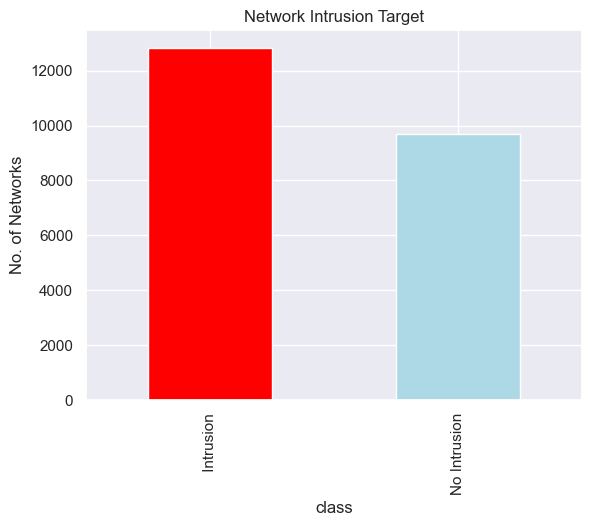

In [21]:
df['class'].value_counts().plot(kind='bar',color=['red','lightblue'])
df['class'].value_counts()
plt.ylabel('No. of Networks')
plt.title('Network Intrusion Target')
plt.xticks([0,1],(' Intrusion', 'No Intrusion'));
df.info()

In [3]:
# Check for missing values and display summary statistics
print("\nMissing values in the dataset:")
print(df.isna().sum())



Missing values in the dataset:
duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
num_root                       0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_host_rate             0
dst_host_co

To remove any null values in the dataset 

In [6]:
#to remove null values dataset
import pandas as pd

def remove_null_samples(dataset):
    # Creating a DataFrame from the input dataset if it's not already in DataFrame format
    if not isinstance(dataset, pd.DataFrame):
        dataset = pd.DataFrame(dataset)
    
    # Removing rows with any null values
    cleaned_dataset = dataset.dropna()
    
    return cleaned_dataset

# Example usage:
dataset = pd.read_csv("networkintrusion.csv")
cleaned_dataset = remove_null_samples(dataset)
cleaned_dataset.to_csv("removed_nullvalues.csv", index=False)
print(f"Cleaned dataset saved to cleaned_dataset.csv")


Cleaned dataset saved to cleaned_dataset.csv


Random Forest model

Classification Report (Train):
              precision    recall  f1-score   support

           0       0.89      0.92      0.91      7762
           1       0.94      0.92      0.93     10261

    accuracy                           0.92     18023
   macro avg       0.92      0.92      0.92     18023
weighted avg       0.92      0.92      0.92     18023


Classification Report (Test):
              precision    recall  f1-score   support

           0       0.90      0.92      0.91      1940
           1       0.94      0.92      0.93      2566

    accuracy                           0.92      4506
   macro avg       0.92      0.92      0.92      4506
weighted avg       0.92      0.92      0.92      4506


Confusion Matrix (Test):
[[1787  153]
 [ 197 2369]]


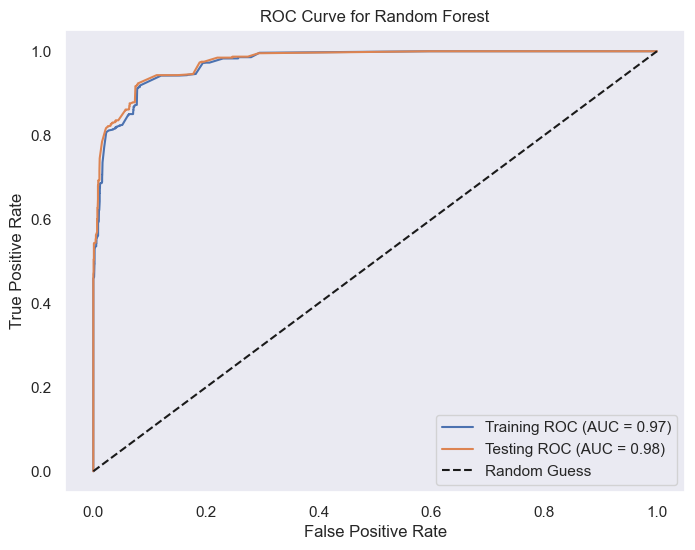

In [7]:
#random forest model
# Define the Random Forest model
rf_model = RandomForestClassifier(random_state=42, n_estimators=6, max_depth=3)

# Train the model
rf_model.fit(X_train, y_train)

# Predictions
y_train_pred = rf_model.predict(X_train)
y_test_pred = rf_model.predict(X_test)

# Evaluation
print("Classification Report (Train):")
print(classification_report(y_train, y_train_pred))
print("\nClassification Report (Test):")
print(classification_report(y_test, y_test_pred))

print("\nConfusion Matrix (Test):")
print(confusion_matrix(y_test, y_test_pred))

# ROC Curve
y_train_prob = rf_model.predict_proba(X_train)[:, 1]
y_test_prob = rf_model.predict_proba(X_test)[:, 1]

fpr_train, tpr_train, _ = roc_curve(y_train, y_train_prob)
fpr_test, tpr_test, _ = roc_curve(y_test, y_test_prob)

roc_auc_train = auc(fpr_train, tpr_train)
roc_auc_test = auc(fpr_test, tpr_test)

# Plotting ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_train, tpr_train, label=f'Training ROC (AUC = {roc_auc_train:.2f})')
plt.plot(fpr_test, tpr_test, label=f'Testing ROC (AUC = {roc_auc_test:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.title('ROC Curve for Random Forest')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid()
plt.show()


K-nearest neighbor model

Cross-Validation Accuracy Scores: [0.97226075 0.97253814 0.97309293 0.9736404  0.9736404 ]
Mean Cross-Validation Accuracy: 0.9730
Classification Report (Train):
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      7762
           1       0.98      0.99      0.98     10261

    accuracy                           0.98     18023
   macro avg       0.98      0.98      0.98     18023
weighted avg       0.98      0.98      0.98     18023


Classification Report (Test):
              precision    recall  f1-score   support

           0       0.98      0.97      0.97      1940
           1       0.98      0.98      0.98      2566

    accuracy                           0.98      4506
   macro avg       0.98      0.98      0.98      4506
weighted avg       0.98      0.98      0.98      4506


Confusion Matrix (Test):
[[1887   53]
 [  45 2521]]


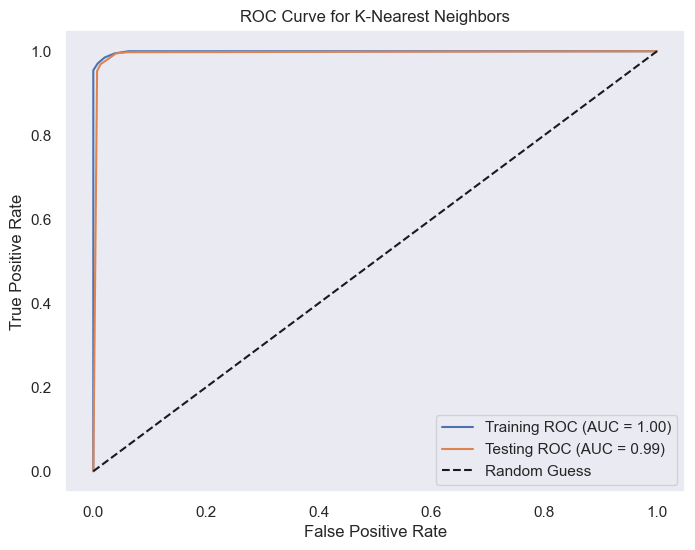

In [15]:
#KNN
# Define the KNN model
knn_model = KNeighborsClassifier(n_neighbors=5)  # Default: 5 neighbors

# Cross-Validation
cv_scores = cross_val_score(knn_model, X_train, y_train, cv=5, scoring='accuracy')
print(f'Cross-Validation Accuracy Scores: {cv_scores}')
print(f'Mean Cross-Validation Accuracy: {cv_scores.mean():.4f}')

# Train the model
knn_model.fit(X_train, y_train)

# Predictions
y_train_pred = knn_model.predict(X_train)
y_test_pred = knn_model.predict(X_test)

# Evaluation
print("Classification Report (Train):")
print(classification_report(y_train, y_train_pred))
print("\nClassification Report (Test):")
print(classification_report(y_test, y_test_pred))

print("\nConfusion Matrix (Test):")
print(confusion_matrix(y_test, y_test_pred))

# ROC Curve
y_train_prob = knn_model.predict_proba(X_train)[:, 1]
y_test_prob = knn_model.predict_proba(X_test)[:, 1]

fpr_train, tpr_train, _ = roc_curve(y_train, y_train_prob)
fpr_test, tpr_test, _ = roc_curve(y_test, y_test_prob)

roc_auc_train = auc(fpr_train, tpr_train)
roc_auc_test = auc(fpr_test, tpr_test)

# Plotting ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_train, tpr_train, label=f'Training ROC (AUC = {roc_auc_train:.2f})')
plt.plot(fpr_test, tpr_test, label=f'Testing ROC (AUC = {roc_auc_test:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.title('ROC Curve for K-Nearest Neighbors')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid()
plt.show()


In [11]:
data['class'].value_counts()

class
1    12827
0     9702
Name: count, dtype: int64

Logistic Regression model

Classification Report (Train):
              precision    recall  f1-score   support

           0       0.95      0.93      0.94      7762
           1       0.95      0.96      0.96     10261

    accuracy                           0.95     18023
   macro avg       0.95      0.95      0.95     18023
weighted avg       0.95      0.95      0.95     18023


Classification Report (Test):
              precision    recall  f1-score   support

           0       0.95      0.94      0.94      1940
           1       0.96      0.96      0.96      2566

    accuracy                           0.95      4506
   macro avg       0.95      0.95      0.95      4506
weighted avg       0.95      0.95      0.95      4506


Confusion Matrix (Test):
[[1824  116]
 [ 104 2462]]


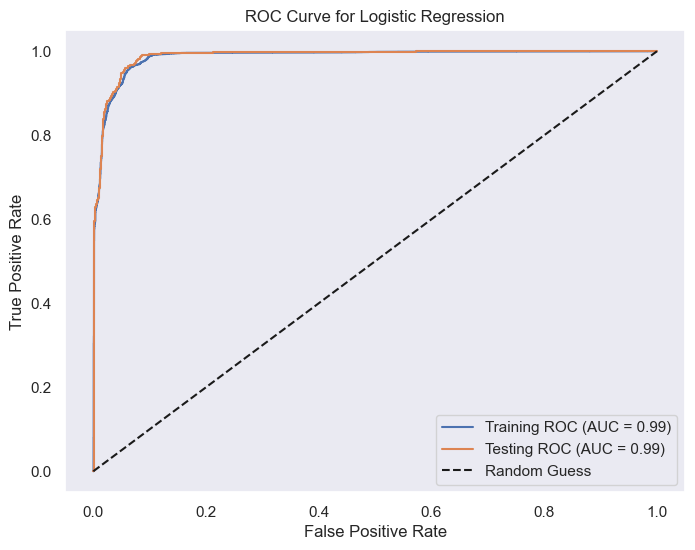

In [12]:
#LR model
# Define the Logistic Regression model
lr_model = LogisticRegression(random_state=42, max_iter=500)

# Train the model
lr_model.fit(X_train, y_train)

# Predictions
y_train_pred = lr_model.predict(X_train)
y_test_pred = lr_model.predict(X_test)

# Evaluation
print("Classification Report (Train):")
print(classification_report(y_train, y_train_pred))
print("\nClassification Report (Test):")
print(classification_report(y_test, y_test_pred))

print("\nConfusion Matrix (Test):")
print(confusion_matrix(y_test, y_test_pred))

# ROC Curve
y_train_prob = lr_model.predict_proba(X_train)[:, 1]
y_test_prob = lr_model.predict_proba(X_test)[:, 1]

fpr_train, tpr_train, _ = roc_curve(y_train, y_train_prob)
fpr_test, tpr_test, _ = roc_curve(y_test, y_test_prob)

roc_auc_train = auc(fpr_train, tpr_train)
roc_auc_test = auc(fpr_test, tpr_test)

# Plotting ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_train, tpr_train, label=f'Training ROC (AUC = {roc_auc_train:.2f})')
plt.plot(fpr_test, tpr_test, label=f'Testing ROC (AUC = {roc_auc_test:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.title('ROC Curve for Logistic Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid()
plt.show()

#model = LogisticRegression(penalty='l1',             # L1 regularization
    #solver='saga',            # Solver compatible with L1
    #C=0.1,                    # Stronger regularization
    #max_iter=1000,             # Increase max iterations
    #class_weight='balanced',  # Handle class imbalance
    #tol=1e-4 )

Support vector machine (SVM) model

Classification Report (Train):
              precision    recall  f1-score   support

           0       0.98      0.96      0.97      7762
           1       0.97      0.98      0.97     10261

    accuracy                           0.97     18023
   macro avg       0.97      0.97      0.97     18023
weighted avg       0.97      0.97      0.97     18023


Classification Report (Test):
              precision    recall  f1-score   support

           0       0.98      0.96      0.97      1940
           1       0.97      0.99      0.98      2566

    accuracy                           0.97      4506
   macro avg       0.97      0.97      0.97      4506
weighted avg       0.97      0.97      0.97      4506


Confusion Matrix (Test):
[[1859   81]
 [  36 2530]]


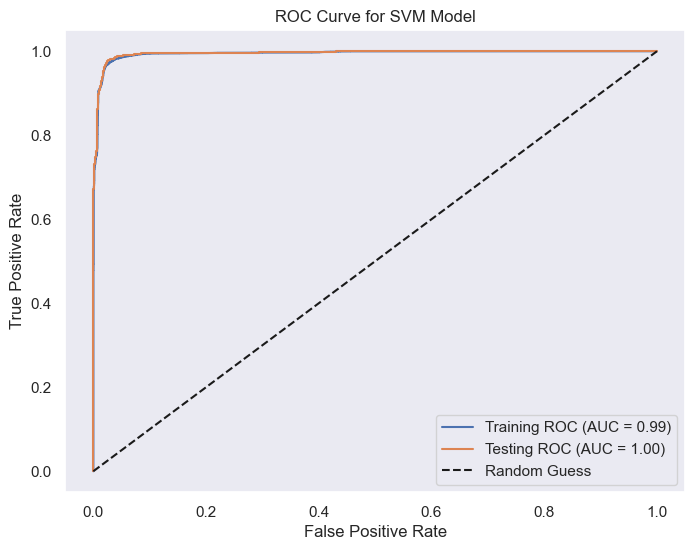

In [16]:

# Train SVM model
svm_model = SVC(kernel='rbf', gamma='scale', class_weight='balanced', probability=True, random_state=42)
svm_model.fit(X_train, y_train)

# Predictions
y_train_pred = svm_model.predict(X_train)
y_test_pred = svm_model.predict(X_test)

# Evaluation
print("Classification Report (Train):")
print(classification_report(y_train, y_train_pred))
print("\nClassification Report (Test):")
print(classification_report(y_test, y_test_pred))

print("\nConfusion Matrix (Test):")
print(confusion_matrix(y_test, y_test_pred))

# ROC Curve
y_train_prob = svm_model.predict_proba(X_train)[:, 1]
y_test_prob = svm_model.predict_proba(X_test)[:, 1]

fpr_train, tpr_train, _ = roc_curve(y_train, y_train_prob)
fpr_test, tpr_test, _ = roc_curve(y_test, y_test_prob)

roc_auc_train = auc(fpr_train, tpr_train)
roc_auc_test = auc(fpr_test, tpr_test)

plt.figure(figsize=(8, 6))
plt.plot(fpr_train, tpr_train, label=f'Training ROC (AUC = {roc_auc_train:.2f})')
plt.plot(fpr_test, tpr_test, label=f'Testing ROC (AUC = {roc_auc_test:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.title('ROC Curve for SVM Model')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid()
plt.show()


Naive bayes model

Classification Report (Train):
              precision    recall  f1-score   support

           0       0.85      0.94      0.90      7762
           1       0.95      0.88      0.91     10261

    accuracy                           0.91     18023
   macro avg       0.90      0.91      0.90     18023
weighted avg       0.91      0.91      0.91     18023


Classification Report (Test):
              precision    recall  f1-score   support

           0       0.86      0.95      0.90      1940
           1       0.96      0.88      0.92      2566

    accuracy                           0.91      4506
   macro avg       0.91      0.92      0.91      4506
weighted avg       0.92      0.91      0.91      4506


Confusion Matrix (Test):
[[1848   92]
 [ 310 2256]]


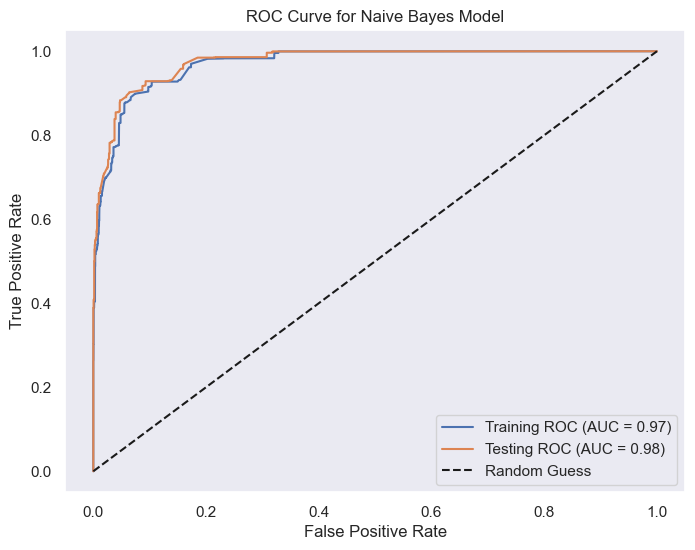

In [22]:
#naive bayes
# Train Naive Bayes model (GaussianNB)
#naive_bayes_model = GaussianNB(var_smoothing= 1e-05)
naive_bayes_model = BernoulliNB(alpha= 0.1,binarize= 1.0)
naive_bayes_model.fit(X_train, y_train)

# Predictions
y_train_pred = naive_bayes_model.predict(X_train)
y_test_pred = naive_bayes_model.predict(X_test)

# Evaluation
print("Classification Report (Train):")
print(classification_report(y_train, y_train_pred))
print("\nClassification Report (Test):")
print(classification_report(y_test, y_test_pred))

print("\nConfusion Matrix (Test):")
print(confusion_matrix(y_test, y_test_pred))

# ROC Curve
y_train_prob = naive_bayes_model.predict_proba(X_train)[:, 1]
y_test_prob = naive_bayes_model.predict_proba(X_test)[:, 1]

fpr_train, tpr_train, _ = roc_curve(y_train, y_train_prob)
fpr_test, tpr_test, _ = roc_curve(y_test, y_test_prob)

roc_auc_train = auc(fpr_train, tpr_train)
roc_auc_test = auc(fpr_test, tpr_test)

plt.figure(figsize=(8, 6))
plt.plot(fpr_train, tpr_train, label=f'Training ROC (AUC = {roc_auc_train:.2f})')
plt.plot(fpr_test, tpr_test, label=f'Testing ROC (AUC = {roc_auc_test:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.title('ROC Curve for Naive Bayes Model')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid()
plt.show()


Decision Tree model

Classification Report (Train):
              precision    recall  f1-score   support

           0       0.98      0.93      0.95      7762
           1       0.95      0.99      0.97     10261

    accuracy                           0.96     18023
   macro avg       0.97      0.96      0.96     18023
weighted avg       0.96      0.96      0.96     18023


Classification Report (Test):
              precision    recall  f1-score   support

           0       0.98      0.92      0.95      1940
           1       0.94      0.99      0.96      2566

    accuracy                           0.96      4506
   macro avg       0.96      0.95      0.96      4506
weighted avg       0.96      0.96      0.96      4506


Confusion Matrix (Test):
[[1788  152]
 [  32 2534]]


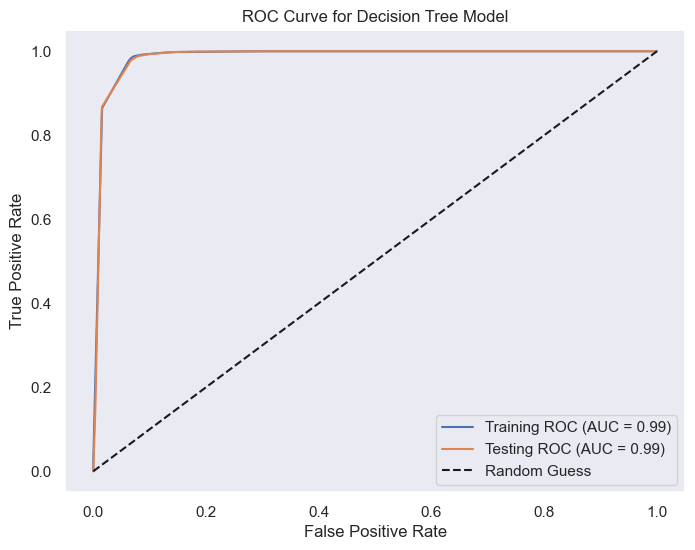

In [7]:
#decison tree
# Initialize and train the Decision Tree model
dt_model = DecisionTreeClassifier(max_depth= 5)
dt_model.fit(X_train, y_train)

# Predictions
y_train_pred = dt_model.predict(X_train)
y_test_pred = dt_model.predict(X_test)

# Evaluation
print("Classification Report (Train):")
print(classification_report(y_train, y_train_pred))
print("\nClassification Report (Test):")
print(classification_report(y_test, y_test_pred))

print("\nConfusion Matrix (Test):")
print(confusion_matrix(y_test, y_test_pred))

# ROC Curve
y_train_prob = dt_model.predict_proba(X_train)[:, 1]
y_test_prob = dt_model.predict_proba(X_test)[:, 1]

fpr_train, tpr_train, _ = roc_curve(y_train, y_train_prob)
fpr_test, tpr_test, _ = roc_curve(y_test, y_test_prob)

roc_auc_train = auc(fpr_train, tpr_train)
roc_auc_test = auc(fpr_test, tpr_test)

# Plotting ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_train, tpr_train, label=f'Training ROC (AUC = {roc_auc_train:.2f})')
plt.plot(fpr_test, tpr_test, label=f'Testing ROC (AUC = {roc_auc_test:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.title('ROC Curve for Decision Tree Model')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid()
plt.show()


Multi-Layer Perceptron (MLP)

Best Parameters: {}
Classification Report (Train):
              precision    recall  f1-score   support

           0       0.99      0.97      0.98      7762
           1       0.98      0.99      0.99     10261

    accuracy                           0.98     18023
   macro avg       0.98      0.98      0.98     18023
weighted avg       0.98      0.98      0.98     18023


Classification Report (Test):
              precision    recall  f1-score   support

           0       0.99      0.97      0.98      1940
           1       0.97      0.99      0.98      2566

    accuracy                           0.98      4506
   macro avg       0.98      0.98      0.98      4506
weighted avg       0.98      0.98      0.98      4506


Confusion Matrix (Test):
[[1873   67]
 [  22 2544]]


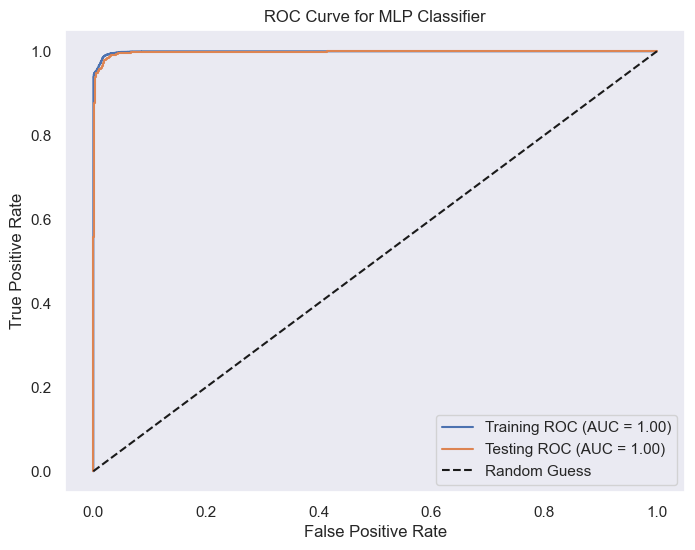

In [ ]:

# Define the model (MLP Classifier with default parameters)
mlp_model = MLPClassifier(random_state=42, max_iter=500)

param_grid = {}  # No hyperparameter grid

# Initialize GridSearchCV
grid_search = GridSearchCV(mlp_model, param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best model after GridSearchCV (though there is no hyperparameter optimization)
best_model = grid_search.best_estimator_

# Print the best parameters (even though there are none in this case)
print("Best Parameters:", grid_search.best_params_)

# Predictions
y_train_pred = best_model.predict(X_train)
y_test_pred = best_model.predict(X_test)

# Evaluation
print("Classification Report (Train):")
print(classification_report(y_train, y_train_pred))
print("\nClassification Report (Test):")
print(classification_report(y_test, y_test_pred))

print("\nConfusion Matrix (Test):")
print(confusion_matrix(y_test, y_test_pred))

# ROC Curve
y_train_prob = best_model.predict_proba(X_train)[:, 1]
y_test_prob = best_model.predict_proba(X_test)[:, 1]

fpr_train, tpr_train, _ = roc_curve(y_train, y_train_prob)
fpr_test, tpr_test, _ = roc_curve(y_test, y_test_prob)

roc_auc_train = auc(fpr_train, tpr_train)
roc_auc_test = auc(fpr_test, tpr_test)

# Plotting ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_train, tpr_train, label=f'Training ROC (AUC = {roc_auc_train:.2f})')
plt.plot(fpr_test, tpr_test, label=f'Testing ROC (AUC = {roc_auc_test:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.title('ROC Curve for MLP Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid()
plt.show()


To plot the accuracy of all the models together

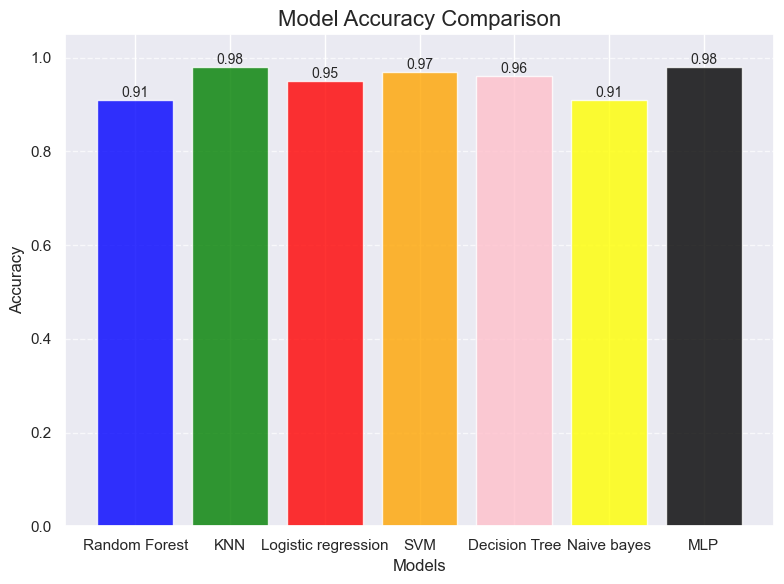

In [ ]:

models = ['Random Forest', 'KNN', 'Logistic regression', 'SVM','Decision Tree','Naive bayes','MLP']
accuracies = [0.91, 0.98, 0.95, 0.97,0.96,0.91,0.98]  # Replace these values with your actual accuracies

# Define colors for the bars
colors = ['blue', 'green', 'red', 'orange','pink','yellow','black']

# Create the bar plot
plt.figure(figsize=(8, 6))
bars = plt.bar(models, accuracies, color=colors, alpha=0.8)

# Add accuracy values on top of the bars
for bar, accuracy in zip(bars, accuracies):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, height, f'{accuracy:.2f}', ha='center', va='bottom', fontsize=10)

# Set plot title and labels
plt.title('Model Accuracy Comparison', fontsize=16)
plt.xlabel('Models', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.ylim(0, 1.05)  # Set y-axis limit slightly above 1 for better visualization
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()
